## Student Performance Dataset: Exploratory Data Analysis 

In this notebook, we're going to analyse Student Performance dataset from Kaggle.

We'll try to answer the following questions:

- Who are the students?
- Which student perform better (male or female)?
- Which group perform better?
- Who has higher parental level of education
- What factor helped the student to get better score?

In [1]:
import pandas as pd
import numpy as np

In [2]:
student_df = pd.read_csv('StudentsPerformance.csv')
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Datatype & Inconsistent value

In [3]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


math score, writing score and reading score already in ' int '.  
**Need to handle category data type**

**gender**

In [4]:
student_df.gender.unique()

array(['female', 'male'], dtype=object)

In [5]:
student_df.gender = student_df.gender.astype('category')
assert student_df.gender.dtype == 'category'

**race/ethnicity**

In [6]:
student_df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
student_df['race/ethnicity'] = student_df['race/ethnicity'].astype('category')
assert student_df['race/ethnicity'].dtype == 'category'

**parental level of education**

In [8]:
student_df['parental level of education'].value_counts(dropna=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
maps ={'some college': 'undergraduate',
       'some high school': 'high school',
       'associate\'s degree': 'undergraduate',
       'bachelor\'s degree': 'undergraduate',
       'master\'s degree': 'postgraduate',
       'high school': 'high school'}

student_df['parental level of education'] = student_df['parental level of education'].map(maps)

In [10]:
student_df['parental level of education'].value_counts(dropna=False)

undergraduate    566
high school      375
postgraduate      59
Name: parental level of education, dtype: int64

In [11]:
student_df['parental level of education'] = student_df['parental level of education'].astype('category')
assert student_df['parental level of education'].dtype == 'category'

**lunch**

In [12]:
student_df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
student_df['lunch'] = student_df['lunch'].astype('category')
assert student_df['lunch'].dtype == 'category'

**test preparation course**

In [14]:
student_df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [15]:
student_df['test preparation course'] = student_df['test preparation course'].astype('category')
assert student_df['test preparation course'].dtype == 'category'

In [16]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.0 KB


## Out of range values 

In [17]:
student_df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [18]:
student_df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [19]:
student_df['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

All Good, no marks above 100

## Missing values 

In [20]:
student_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing value

## Duplicate value 

In [21]:
duplicate = student_df.duplicated(keep=False)
student_df[duplicate]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,undergraduate,standard,none,100,100,100
962,female,group E,undergraduate,standard,none,100,100,100


Either it is duplicate or there are 2 students get the same marks

**FINISH CLEANING**

## Exploratory Data Analysis 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### Who are the student?

Let's take a look at how the students were divided by **gender**.

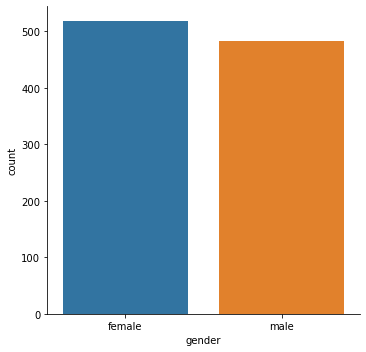

In [23]:
sns.catplot(kind='count', x='gender', data=student_df)

From the countplot above, we can see that female students are slightly more than male students

Let's take a look at how the students were divided among **different race/ethnicity**.

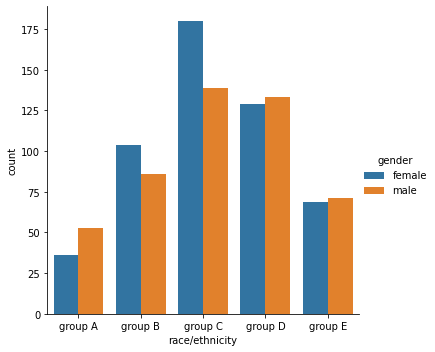

In [24]:
sns.catplot(kind='count', x='race/ethnicity', data=student_df, hue='gender')

Notice that group C contains the highest number of students compare to other group

Let's see how the students devided among **parental level of education**

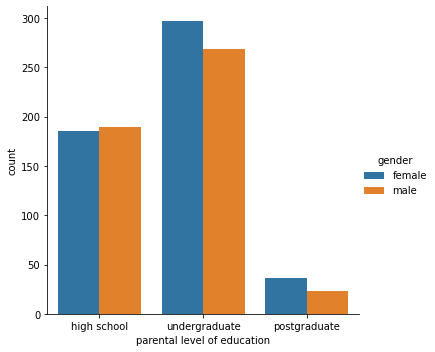

In [25]:
sns.catplot(kind='count', hue='gender', data=student_df, x='parental level of education', order=['high school','undergraduate','postgraduate'])

Most of the students came from undergraduate parents

Let's see how the students devided based on **lunch**

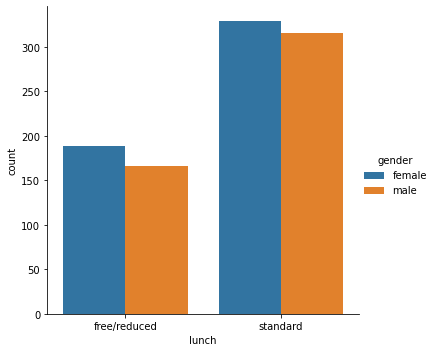

In [26]:
sns.catplot(kind='count', hue='gender', data=student_df, x='lunch')

We can see more students eat standard lunch

Let's take a look at the **score distribution**

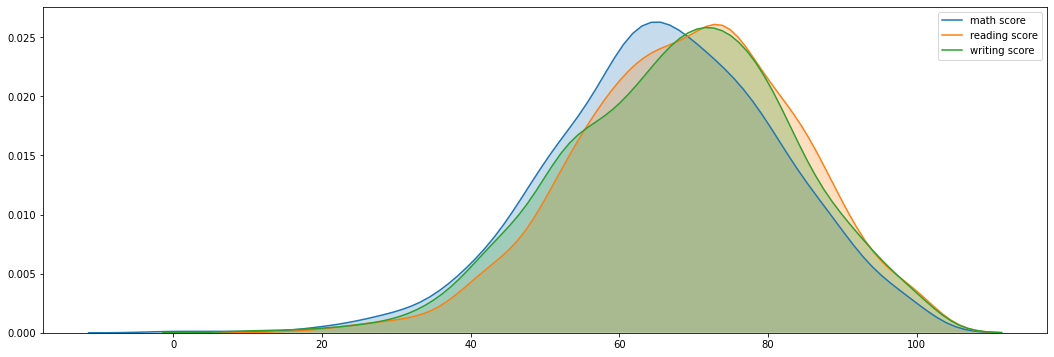

In [54]:
f, ax = plt.subplots(figsize=(18,6))

sns.kdeplot(data=student_df['math score'], shade=True)
sns.kdeplot(data=student_df['reading score'], shade=True)
sns.kdeplot(data=student_df['writing score'], shade=True)

The distribution of **reading score** and **writing score** is almost the same

But for **Math score** the distribution is shifted to the left, that means that student score lower marks on **Math** compare to **reading** and **writing** 

Lets see the corelation between scores

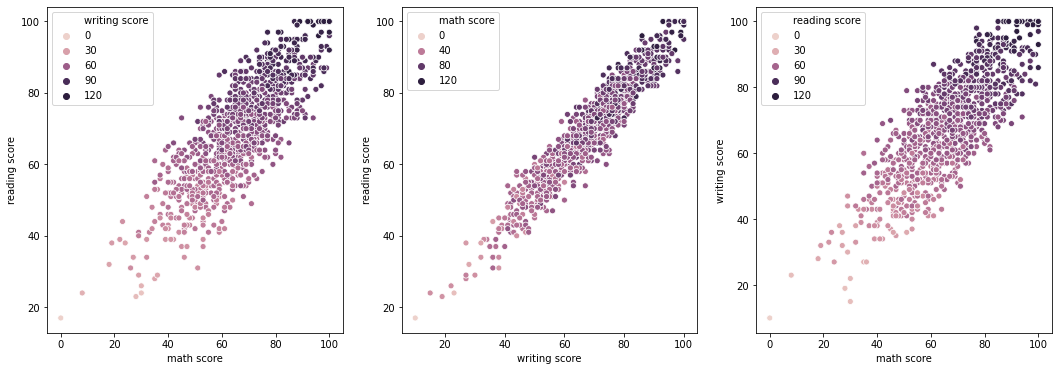

In [28]:
f, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,6))

sns.scatterplot( x='math score', y='reading score', data=student_df, hue='writing score', ax=ax[0])
sns.scatterplot(x='writing score', y='reading score', data=student_df, hue='math score', ax=ax[1])
sns.scatterplot(x='math score', y='writing score', data=student_df, hue='reading score', ax=ax[2])

plt.show()

From above scatterplot we can see student that get high score in one of the subject, tend to get high score in other subject as well

### Which student perform better (male or female)? 

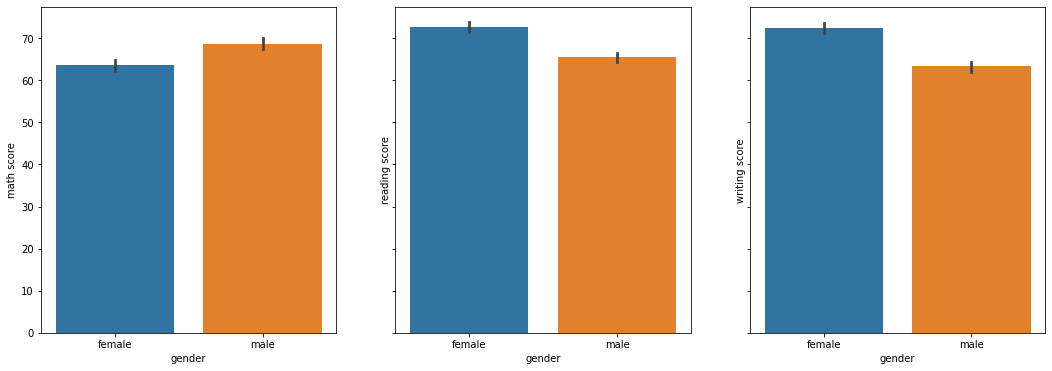

In [29]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharey='row')

sns.barplot(x='gender', y='math score', data=student_df, ax=ax[0])
sns.barplot(x='gender', y='reading score', data=student_df, ax=ax[1])
sns.barplot(x='gender', y='writing score', data=student_df, ax=ax[2])


plt.show()

From above barplot, we can see that male students are doing well on **Math**

On the other hand Female student are better at **Reading** and **Writing**

Let's see how the score distributed among **gender**

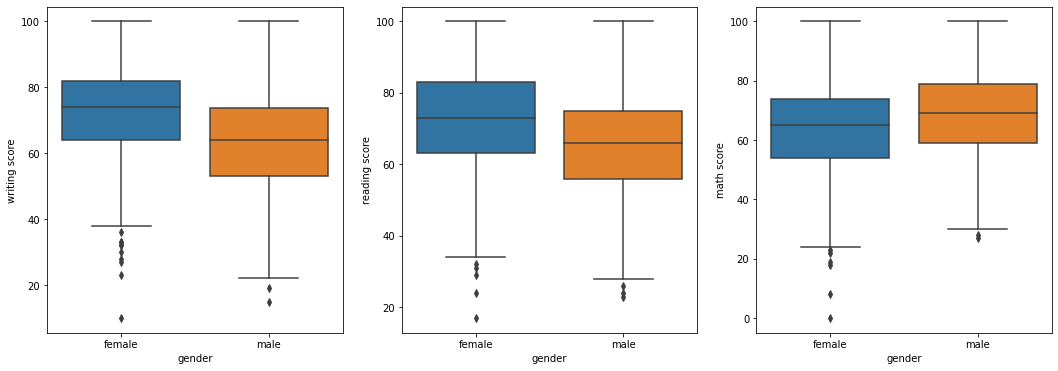

In [30]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.boxplot(data=student_df, y='writing score', x='gender', ax=ax[0])
sns.boxplot(data=student_df, y='reading score', x='gender', ax=ax[1])
sns.boxplot(data=student_df, y='math score', x='gender', ax=ax[2])

plt.show()

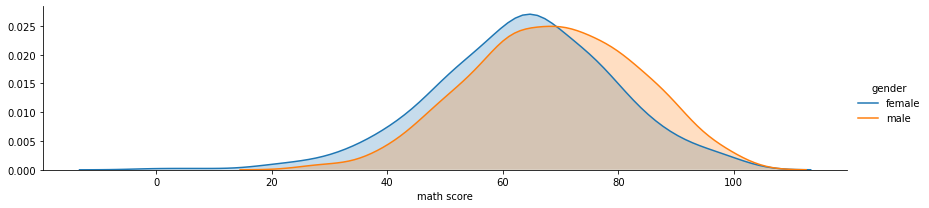

In [58]:
fig = sns.FacetGrid(student_df,hue='gender',aspect=4)

fig.map(sns.kdeplot,'math score',shade=True)
fig.add_legend()

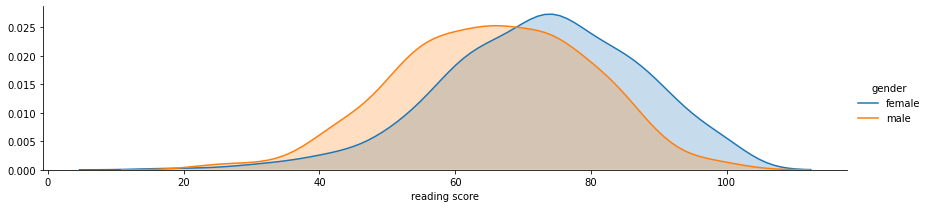

In [59]:
fig = sns.FacetGrid(student_df,hue='gender',aspect=4)

fig.map(sns.kdeplot,'reading score',shade=True)
fig.add_legend()

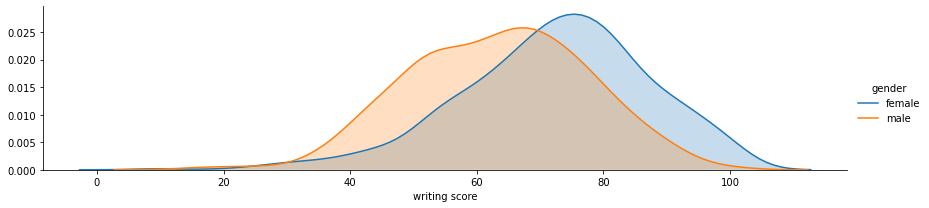

In [60]:
fig = sns.FacetGrid(student_df,hue='gender',aspect=4)

fig.map(sns.kdeplot,'writing score',shade=True)
fig.add_legend()

Based on Box plot and Kde plot we can clearly see that Female students are better than Male students at **writing** and **reading** but not at **Math**

### Does the score have any relationship to parents level of education?

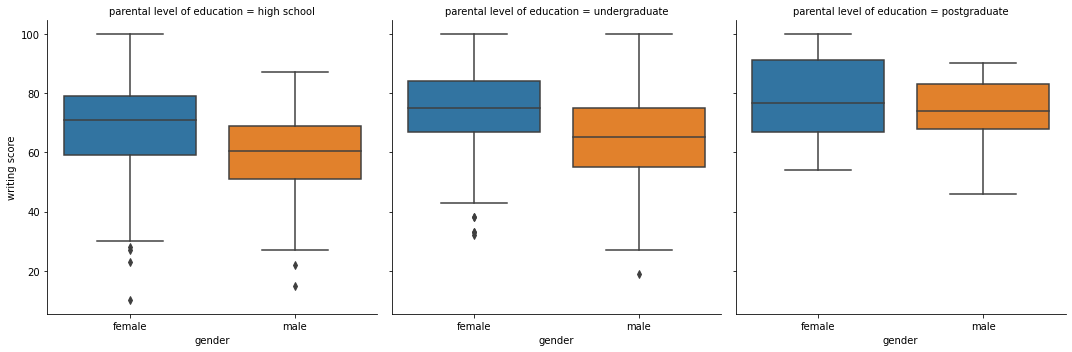

In [31]:
order = ['high school', 'undergraduate', 'postgraduate']
sns.catplot(kind='box',data=student_df, y='writing score', x='gender', col='parental level of education', col_order=order)

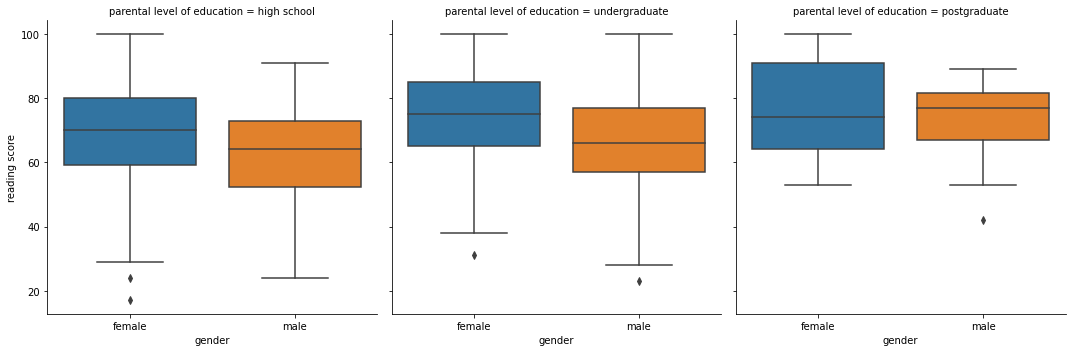

In [32]:
order = ['high school', 'undergraduate', 'postgraduate']
sns.catplot(kind='box',data=student_df, y='reading score', x='gender', col='parental level of education', col_order=order)

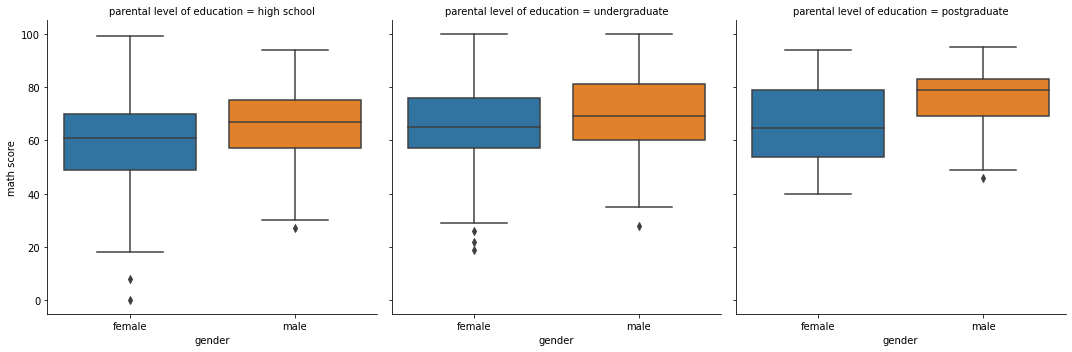

In [33]:
order = ['high school', 'undergraduate', 'postgraduate']
sns.catplot(kind='box',data=student_df, y='math score', x='gender', col='parental level of education', col_order=order)

In general Yes, students with **high educated parents** tend to score higher

From the box plot we can also see that on average:
    
               1) Male students are better than Female students at Math regardless of parents education
               2) Female students are better than Male students at writing regardless of parents education
               3) Male students are better than Female students at reading if their parents are postgraduate 

Now, lets plot the same thing using **point plot**

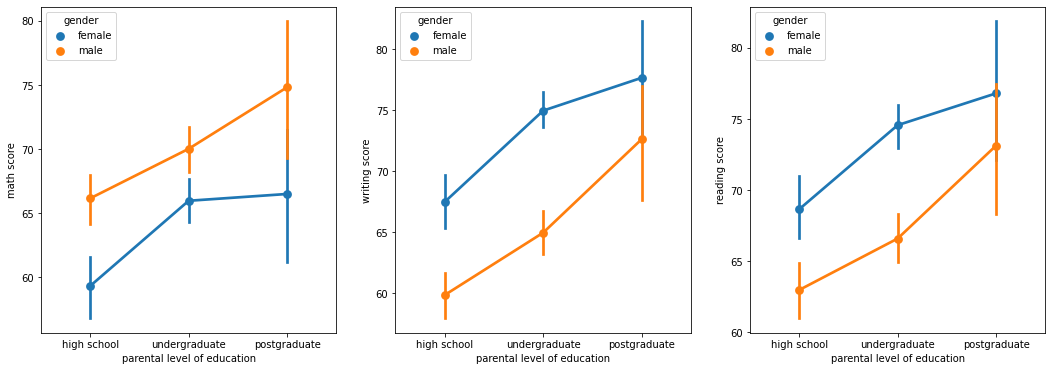

In [34]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.pointplot(y='math score', x='parental level of education', data=student_df, hue='gender', order=order, ax=ax[0])
sns.pointplot(y='writing score', x='parental level of education', data=student_df, hue='gender', order=order, ax=ax[1])
sns.pointplot(y='reading score', x='parental level of education', data=student_df, hue='gender', order=order, ax=ax[2])

plt.show()

Notice that Student with **Postgraduate parents have high variance**

### Does the students perform better if they complete the test preparation course?

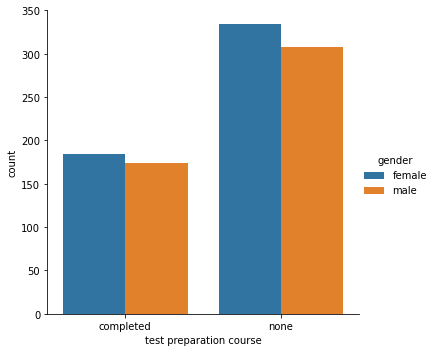

In [35]:
sns.catplot(kind='count', x='test preparation course', data=student_df, hue='gender')

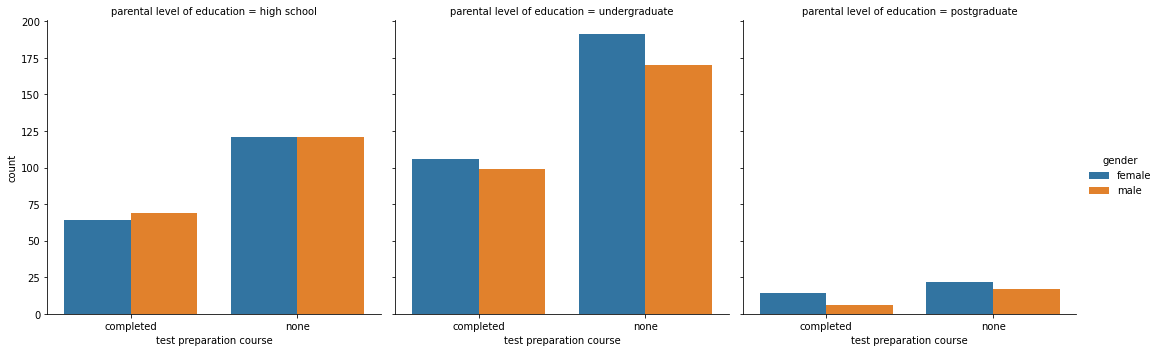

In [36]:
sns.catplot(kind='count', x='test preparation course', data=student_df, col='parental level of education', col_order=order, hue='gender')

There are more students who did not complete the preparation course

Let's see the relationship between **score** and **preparation course**

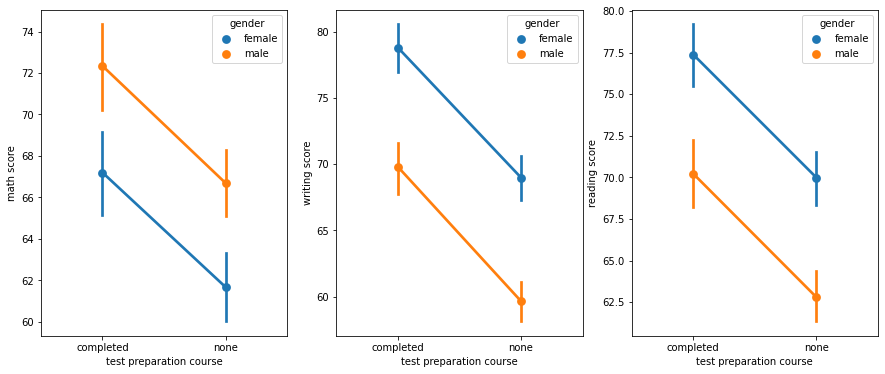

In [37]:
f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

sns.pointplot(y='math score', x='test preparation course', data=student_df, hue='gender',ax=ax[0])
sns.pointplot(y='writing score', x='test preparation course', data=student_df, hue='gender',ax=ax[1])
sns.pointplot(y='reading score', x='test preparation course', data=student_df, hue='gender', ax=ax[2])

plt.show()

Student that complete the preparation course get better score

Let's see how it is saperated among **parents level of education**

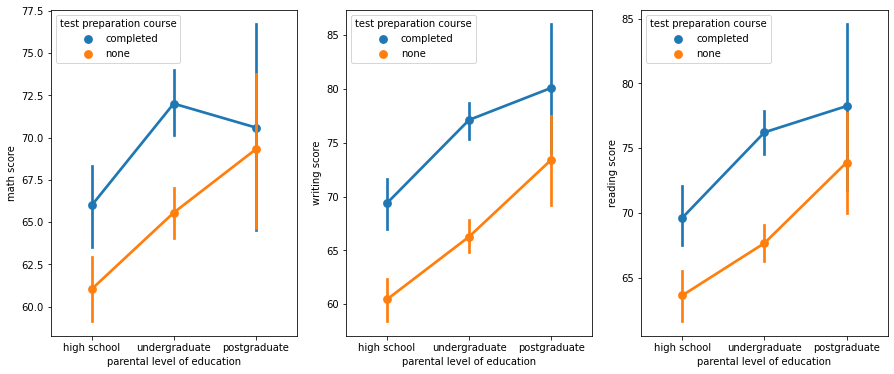

In [38]:
f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

sns.pointplot(y='math score',x='parental level of education', hue='test preparation course', data=student_df,ax=ax[0],order=order)
sns.pointplot(y='writing score', x='parental level of education', hue='test preparation course', data=student_df,ax=ax[1],order=order)
sns.pointplot(y='reading score', x='parental level of education', hue='test preparation course', data=student_df, ax=ax[2],order=order)

plt.show()

In math score for postgraduate parents
               
               1)There are students can get better marks eventhough they did not complete the preparation course
               
               2) There are students that get lower marks eventhough they completed the preparation course

Now let's see the distribution for **Male student only**

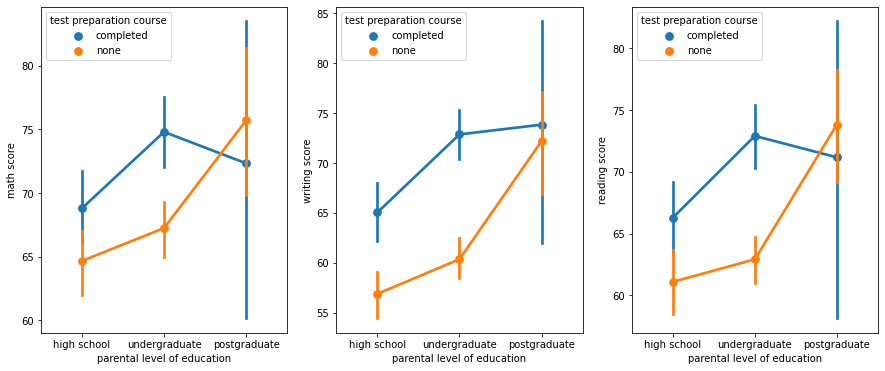

In [39]:
#Male Students Only
f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

sns.pointplot(y='math score',x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'male'],ax=ax[0],order=order)
sns.pointplot(y='writing score', x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'male'],ax=ax[1],order=order)
sns.pointplot(y='reading score', x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'male'], ax=ax[2],order=order)

plt.show()

The score for Male students with postgraduate parents have high variance

               1) There are students who complete the preparation course get low marks
               
               2) There are students that did not complete the preparation course but get high marks 

Now let's see the distribution for **Female student only**

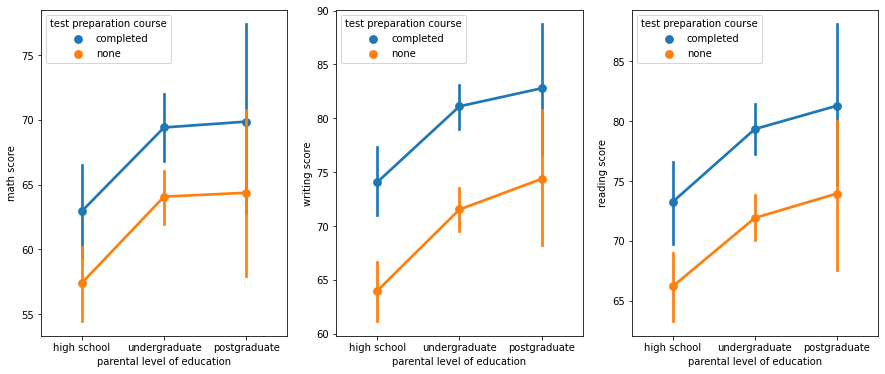

In [40]:
#Female students Only
f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

sns.pointplot(y='math score',x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'female'],ax=ax[0],order=order)
sns.pointplot(y='writing score', x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'female'],ax=ax[1],order=order)
sns.pointplot(y='reading score', x='parental level of education', hue='test preparation course', data=student_df[student_df.gender == 'female'], ax=ax[2],order=order)

plt.show()

The high variance in students with postgraduate parents means that, some students are genius and some are stupid

1) **Genius:** Did not complete the preparation course but get high score

2) **Stupid:** Complete the preparation course but get lower score

Let's find the students **(Genius and Stupid)** sits in which group

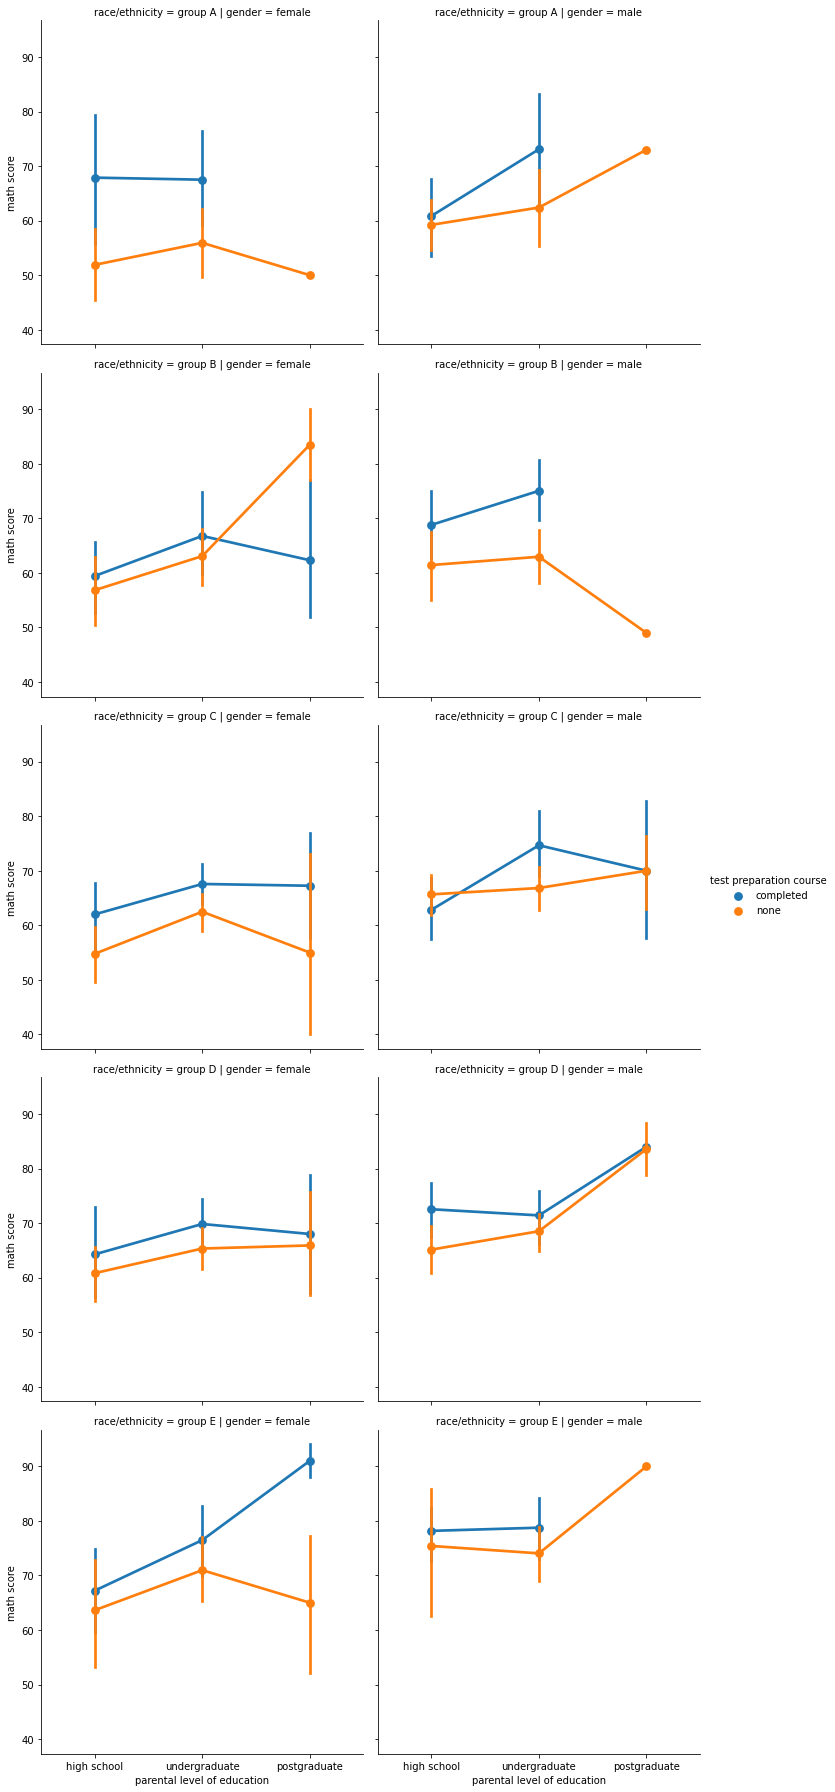

In [41]:
sns.catplot(kind='point', y='math score', x='parental level of education', hue='test preparation course', data=student_df, order=order, col='gender',row='race/ethnicity')

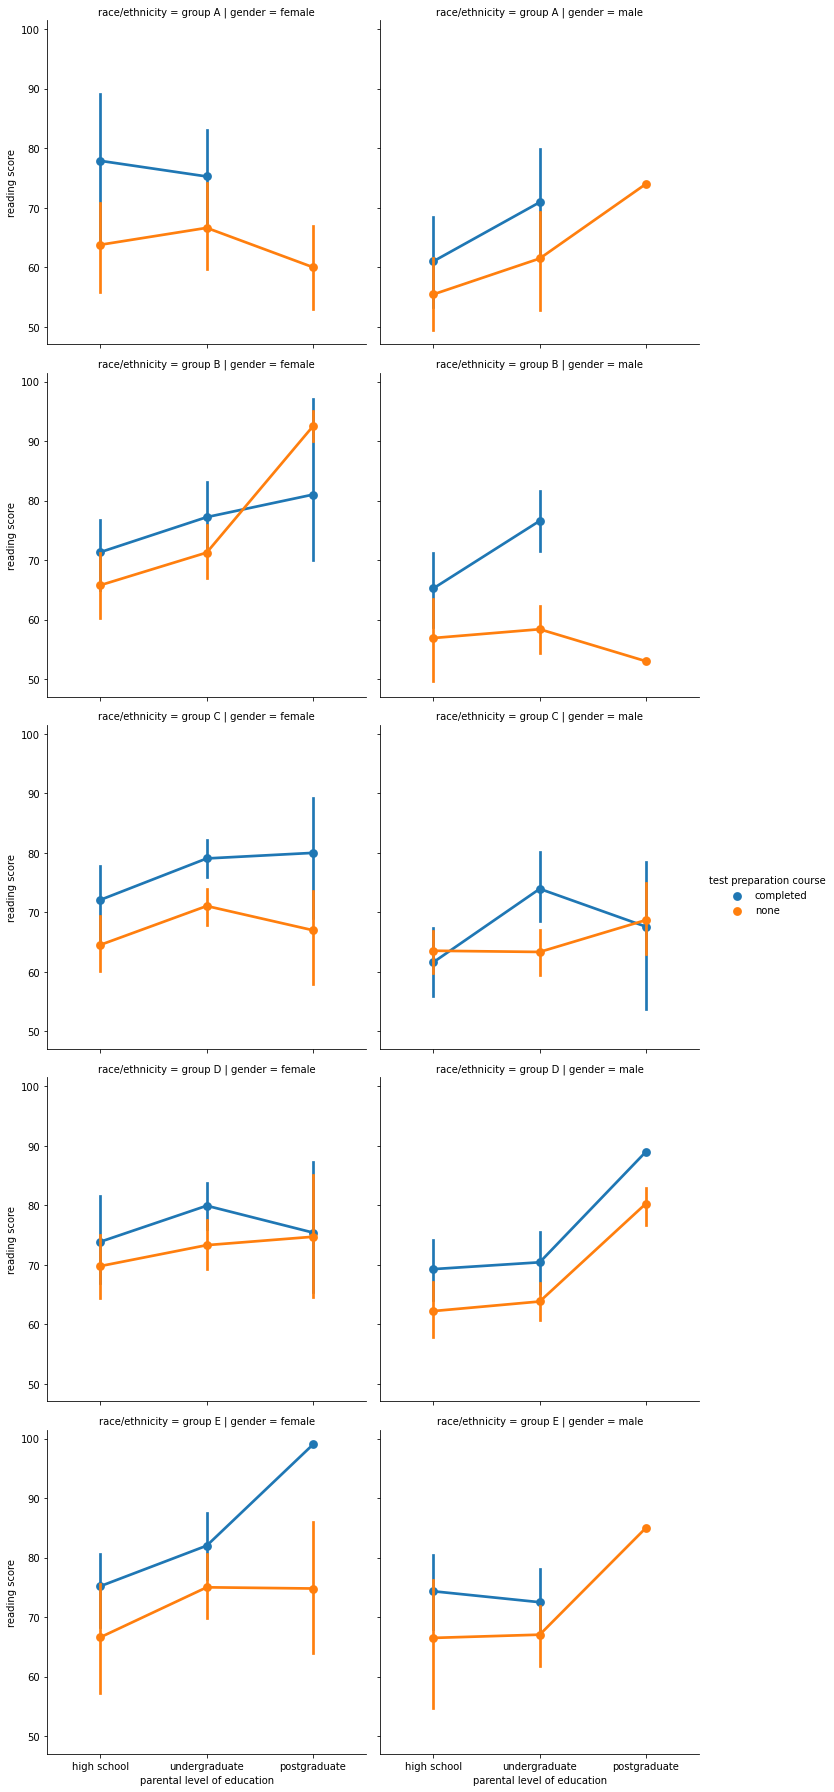

In [61]:
sns.catplot(kind='point', y='reading score', x='parental level of education', hue='test preparation course', data=student_df, order=order, col='gender',row='race/ethnicity')

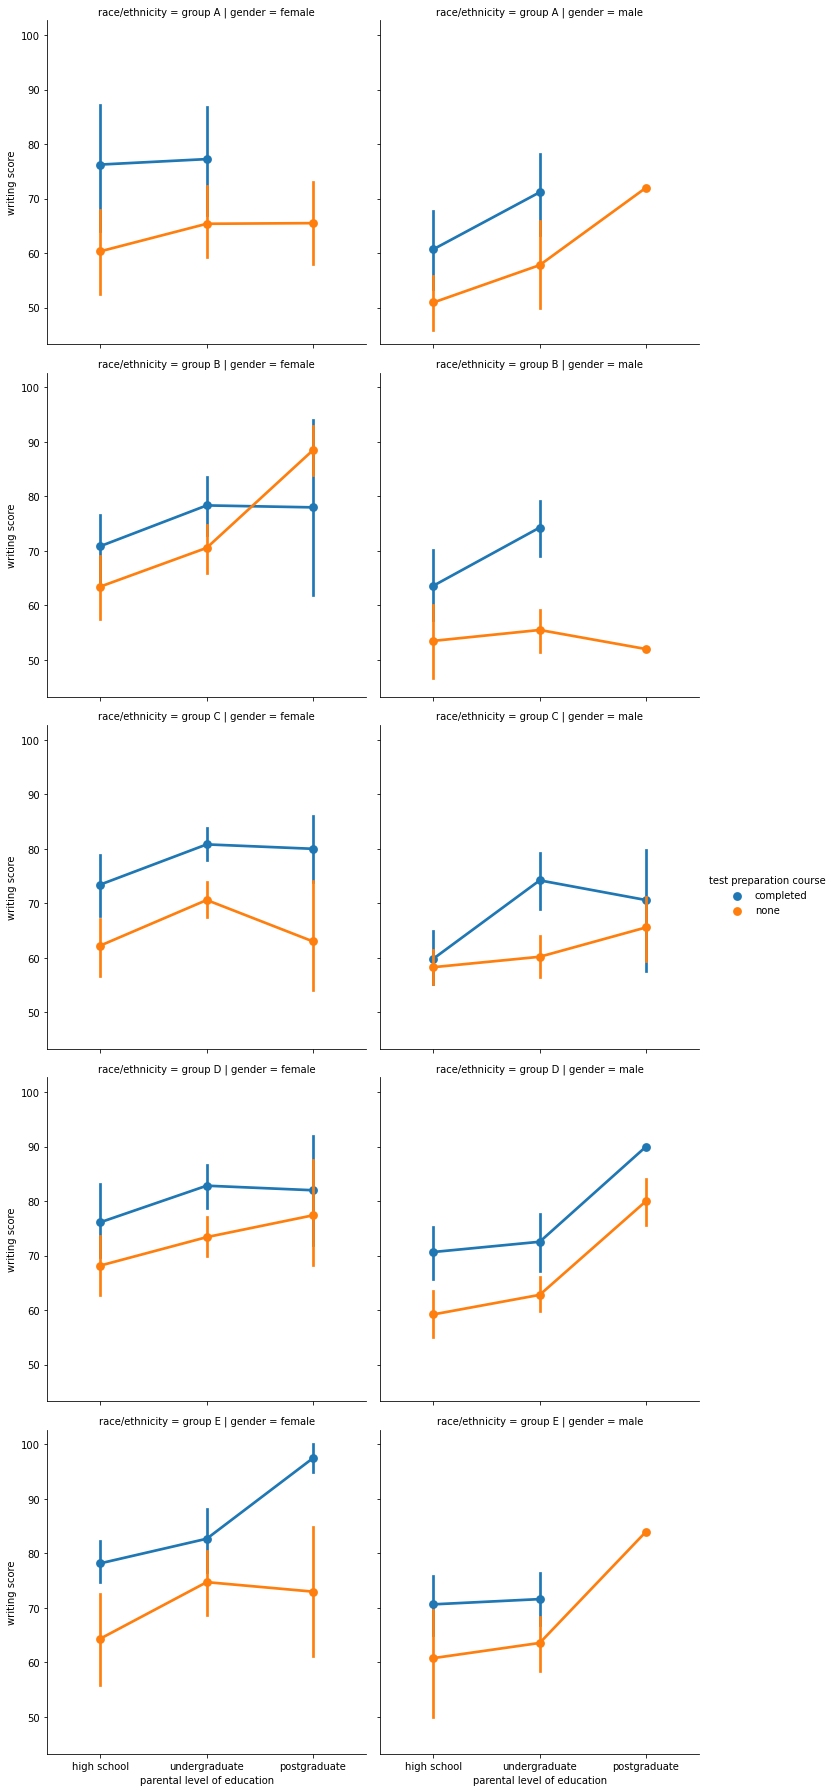

In [43]:
sns.catplot(kind='point', y='writing score', x='parental level of education', hue='test preparation course', data=student_df, order=order, col='gender',row='race/ethnicity')

Female in group B and Male in group E is a **Genius**

Male in group C is **Stupid**

### Which group perform better? 

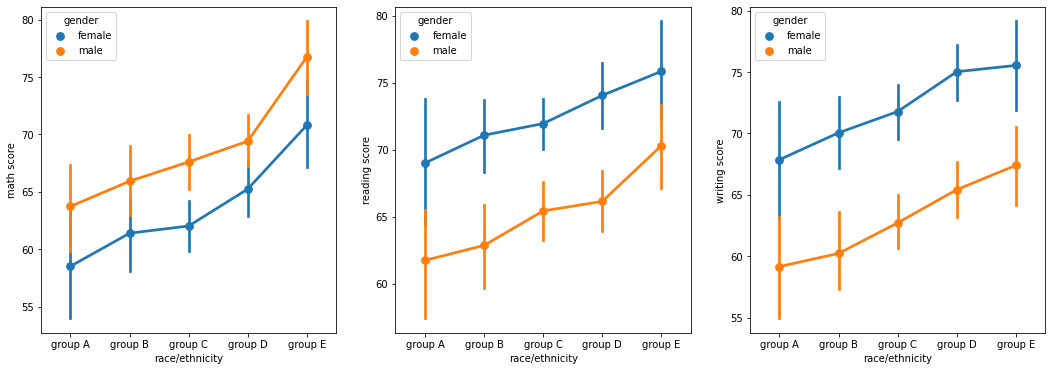

In [49]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.pointplot(x='race/ethnicity', y='math score', data=student_df, hue='gender', ax=ax[0])
sns.pointplot(x='race/ethnicity', y='reading score', data=student_df, hue='gender', ax=ax[1])
sns.pointplot(x='race/ethnicity', y='writing score', data=student_df, hue='gender', ax=ax[2])

plt.show()

From the point plot above we clearly see that **group E** perform better compare to other groups

Let's saperate the point plot score vs race/ethnicity between **parental level of education** and **test preparation course**

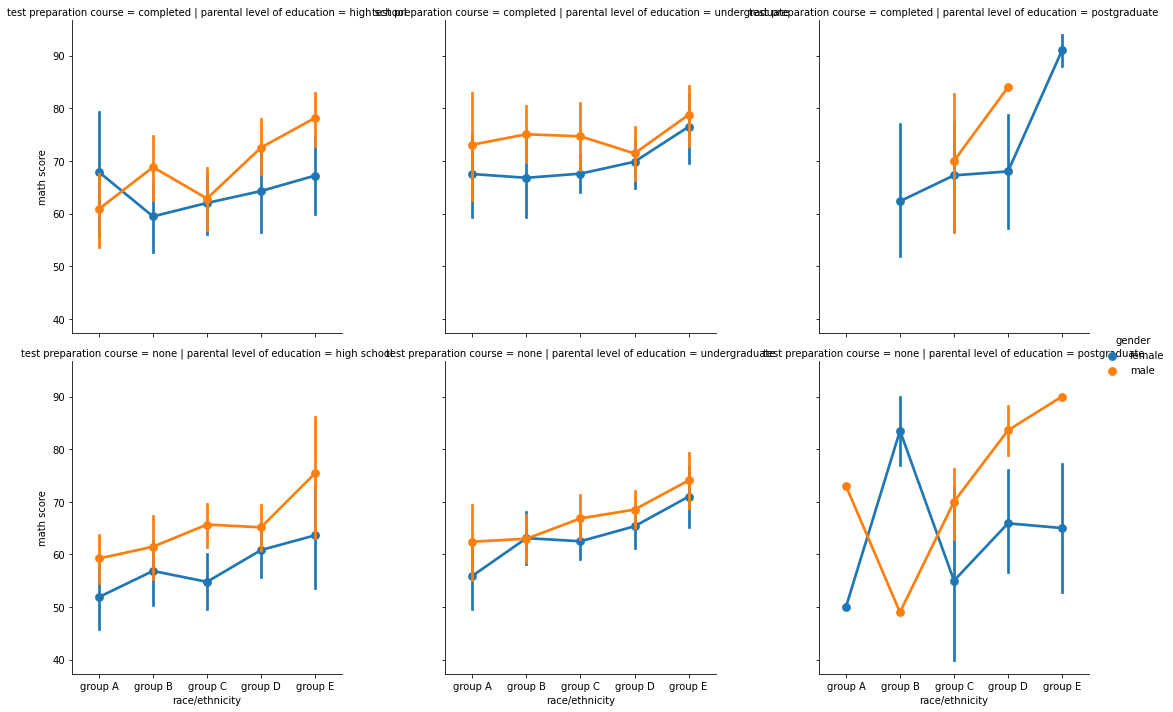

In [50]:
sns.catplot(kind='point', x='race/ethnicity', y='math score', data=student_df, hue='gender',col='parental level of education', col_order=order, row='test preparation course')

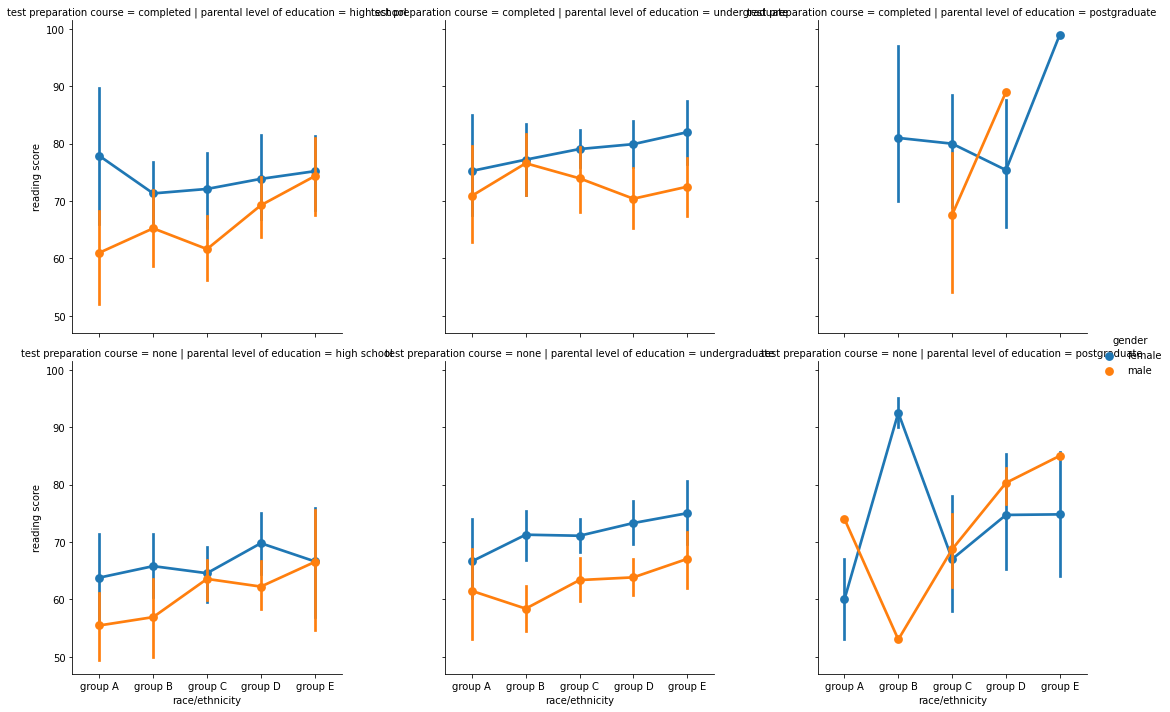

In [51]:
sns.catplot(kind='point', x='race/ethnicity', y='reading score', data=student_df, hue='gender',col='parental level of education', col_order=order, row='test preparation course')

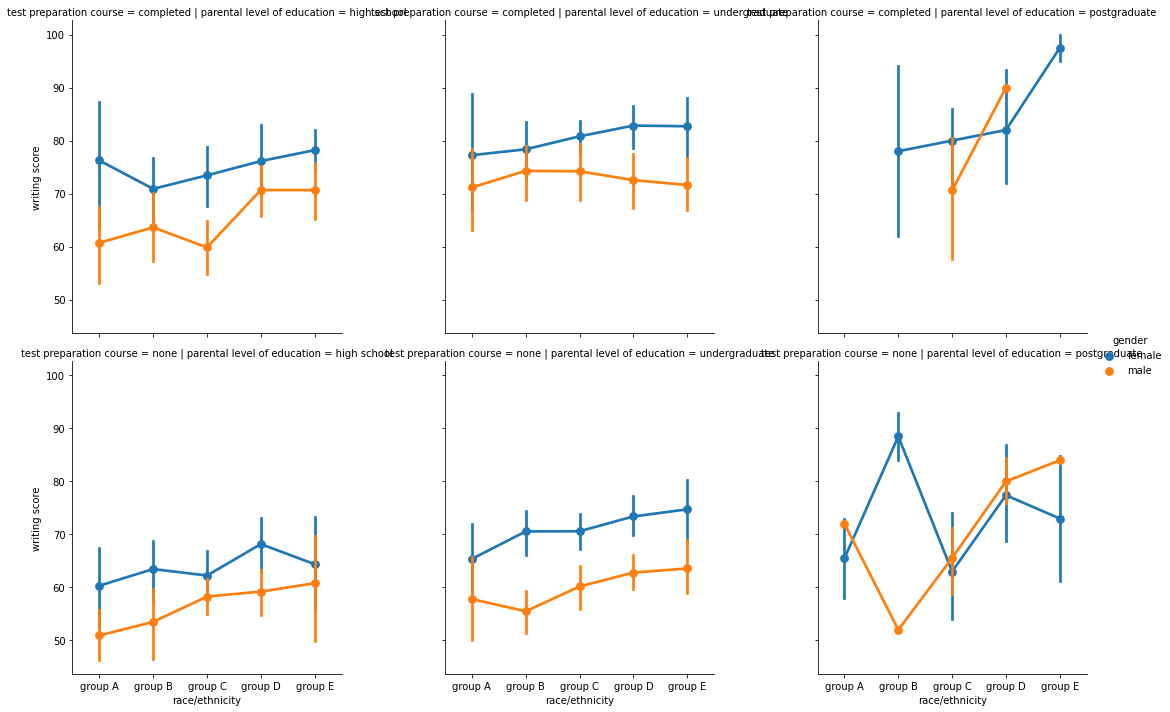

In [52]:
sns.catplot(kind='point', x='race/ethnicity', y='writing score', data=student_df, hue='gender',col='parental level of education', col_order=order, row='test preparation course')

Notice that, 

1) All students with Postgraduate parents in **group A** did not complete the test preparation course

2) All Male students with Postgraduate parents in **group A, B and E** did not complete the test preparation course